In [197]:
import synapseclient as sc
import pandas as pd
import sys
import warnings
sys.path.append("../../src")
import preprocessing_utils as proc
import utils
import seaborn as sns
import matplotlib.pyplot as plt

warnings.simplefilter("ignore")
sns.set_style("dark")
%matplotlib inline

In [265]:
data = utils.get_file_entity("syn21281633")

In [239]:
## helper functions ## 
def visualize_agegroups(data, features):

    fig, axes = plt.subplots(nrows = 5, ncols = 5, figsize= (12, 10))
    

    sns.distplot(data[features][(data["age"] > 20) & (data["age"] <= 30)], kde_kws={"shade": True},
                 hist = False, ax = axes[0,0], color = "purple")
    axes[0,0].grid()
    axes[0,0].set_title("20-30 Years Old")

    sns.distplot(data[features][(data["age"] > 30) & (data["age"] <= 40)], kde_kws={"shade": True}, hist = False,
                 ax = axes[0,0], color = "green")
    axes[0,1].grid()
    axes[0,1].set_title("30-40 Years Old")

    sns.distplot(data[features][(data["age"] > 40) & (data["age"] <= 50)], kde_kws={"shade": True}, hist = False,
                 ax = axes[0,0], color = "red")
    axes[1,0].grid()
    axes[1,0].set_title("40-50 Years Old")


    sns.distplot(data[features][(data["age"] > 50)], kde_kws={"shade": True}, hist = False,
                 ax = axes[0,0], color = "blue")
    axes[1,1].grid()
    axes[1,1].set_title(">50 Years Old")

    plt.tight_layout()
    plt.show()

In [268]:
data.columns

Index(['AA.freeze_occurences', 'AA.frequency_of_peaks',
       'AA.gait_step_regularity', 'AA.gait_stride_regularity',
       'AA.gait_symmetry', 'AA.max_freeze_index', 'AA.no_of_steps',
       'AA.speed_of_gait', 'MS', 'PD', 'age', 'appVersion', 'createdOn',
       'gender', 'healthCode', 'phoneInfo', 'recordId', 'version', 'duration',
       'x.freeze_occurences', 'x.frequency_of_peaks', 'x.gait_step_regularity',
       'x.gait_stride_regularity', 'x.gait_symmetry', 'x.max_freeze_index',
       'x.no_of_steps', 'x.speed_of_gait', 'y.freeze_occurences',
       'y.frequency_of_peaks', 'y.gait_step_regularity',
       'y.gait_stride_regularity', 'y.gait_symmetry', 'y.max_freeze_index',
       'y.no_of_steps', 'y.speed_of_gait', 'z.freeze_occurences',
       'z.frequency_of_peaks', 'z.gait_step_regularity',
       'z.gait_stride_regularity', 'z.gait_symmetry', 'z.max_freeze_index',
       'z.no_of_steps', 'z.speed_of_gait', 'is_control', 'FC.no_of_steps',
       'FC.speed_of_gait', 'FC.n

# 1.) Distribution of Features in Controls Accross Age Bins

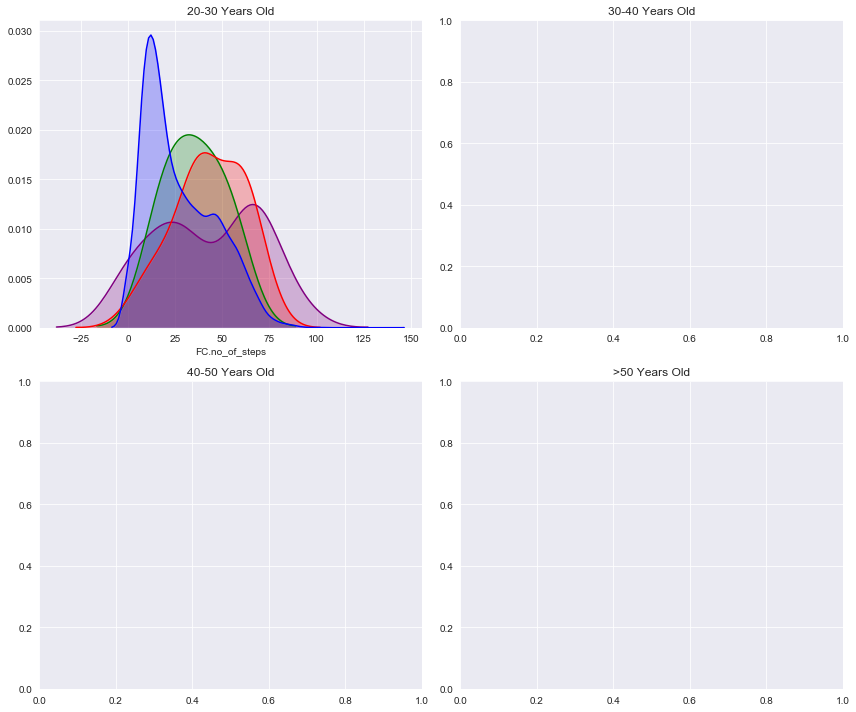

In [271]:
visualize_agegroups(data[(data["is_control"] == 1) & (data["gender"] == "male")], "FC.no_of_steps")

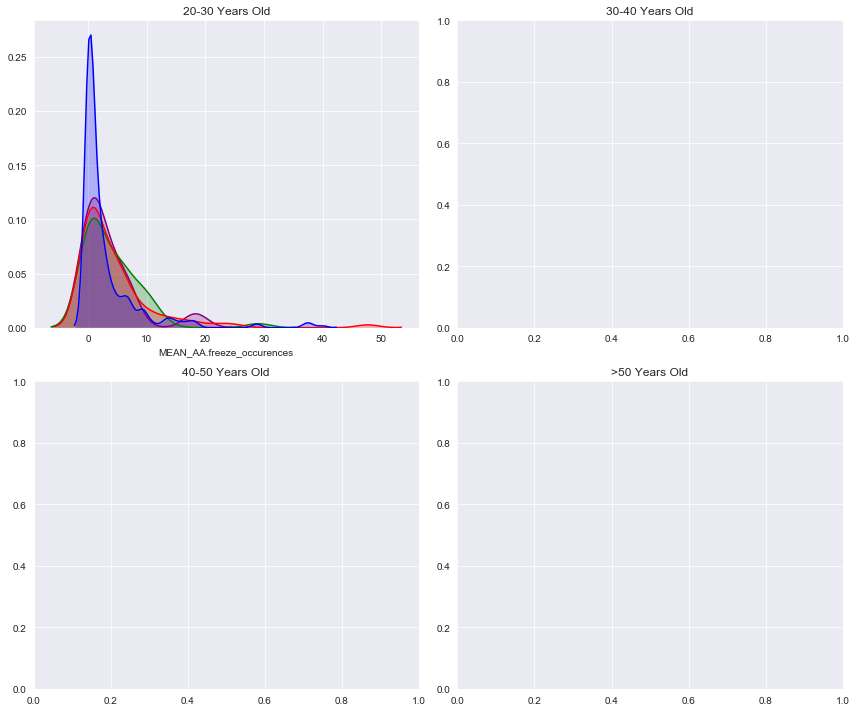

In [251]:
visualize_agegroups(data[data["is_control"] == 1], "MEAN_AA.freeze_occurences")

# Distribution of Controls in mPower Passive

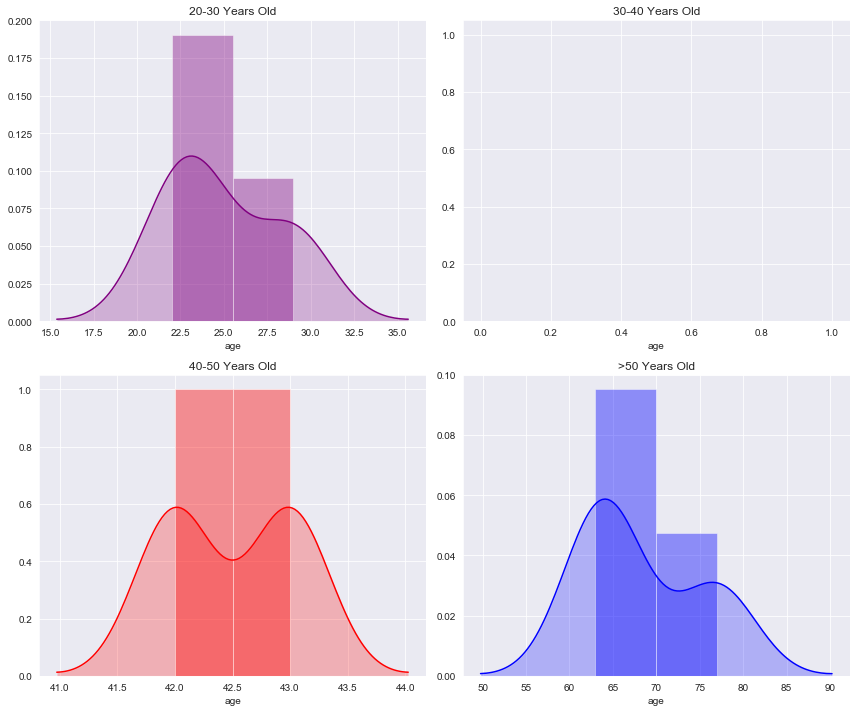

In [134]:
visualize_agegroups(dataPassive[dataPassive["PD"] == 0])

# Distribution of Controls in EMS Active

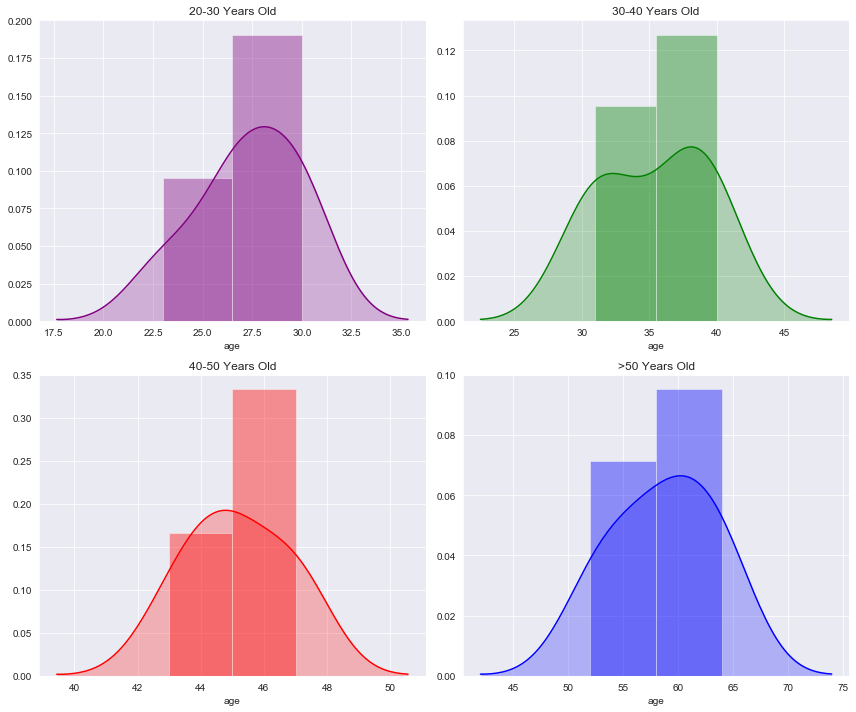

In [142]:
visualize_agegroups(dataEMS_active[dataEMS_active["MS"] == 0])

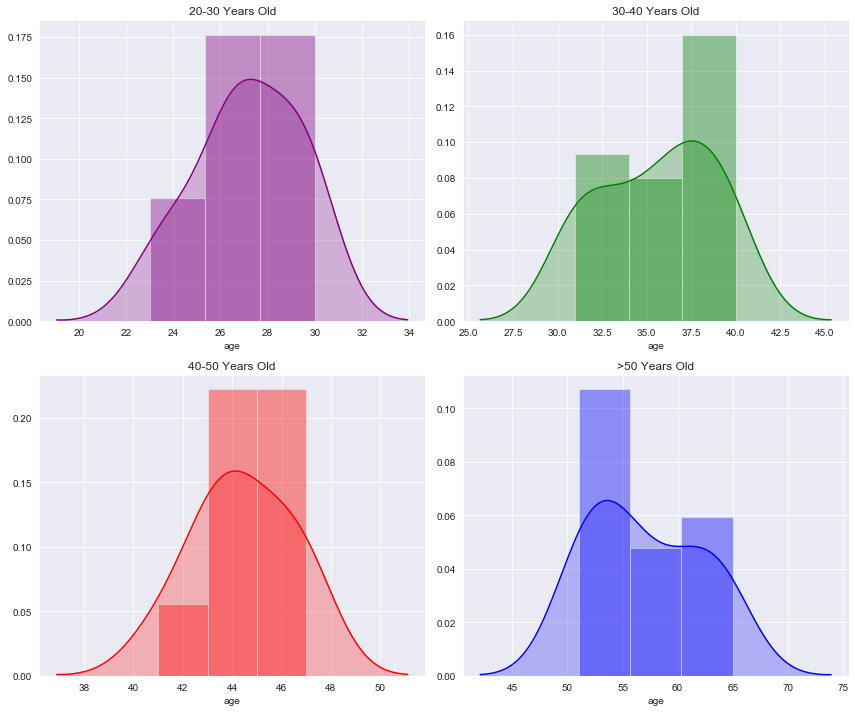

In [143]:
visualize_agegroups(dataEMS_passive[dataEMS_passive["MS"] == 0])

# Distribution of All Controls and Age Subgroup

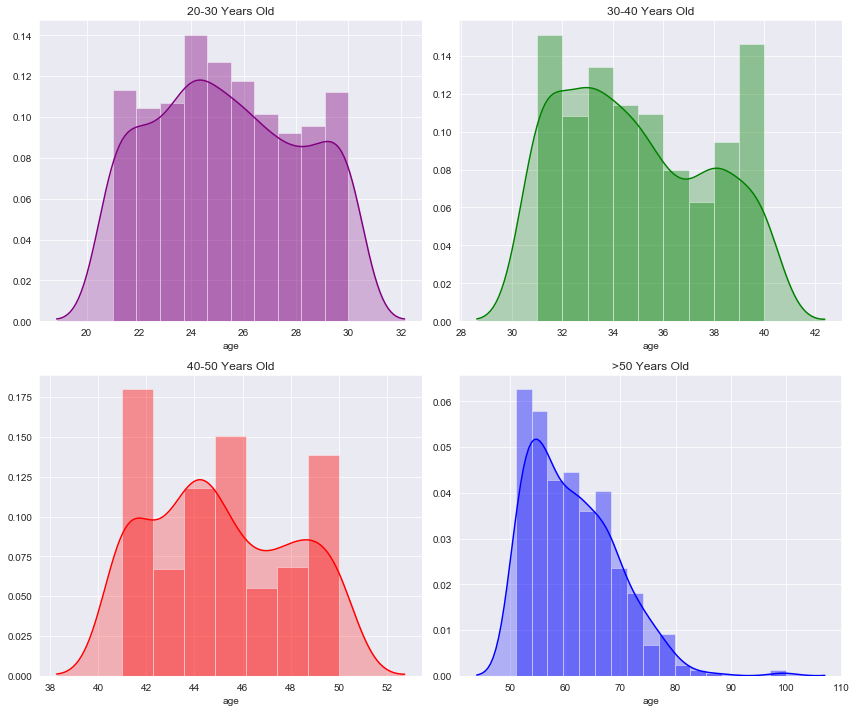

In [156]:
visualize_agegroups(data[(data["PD"] == 0) | (data["MS"] == 0)])

# Distribution of Control vs MS vs PD

In [136]:
data["is_control"] = data.apply(lambda x: 1 if (x["PD"] == 0) | (x["MS"] == 0) else 0, axis = 1) 

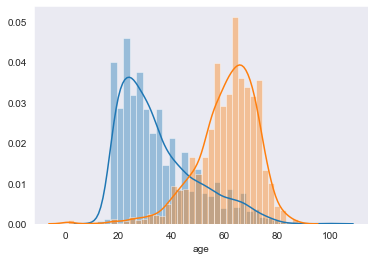

In [140]:
sns.distplot(data["age"][data["is_control"] == 1].dropna())
sns.distplot(data["age"][data["PD"] == 1].dropna())